In [74]:
#Loading libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from scipy.stats import norm

In [2]:
#loading data
df= pd.read_csv("train 11.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [5]:
df.shape

(1168, 81)

In [6]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


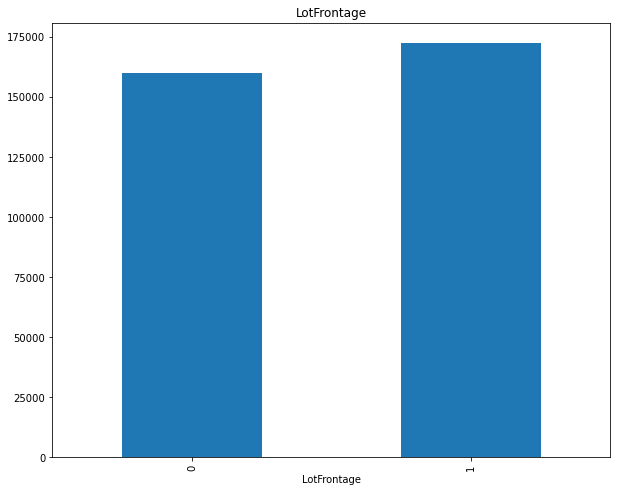

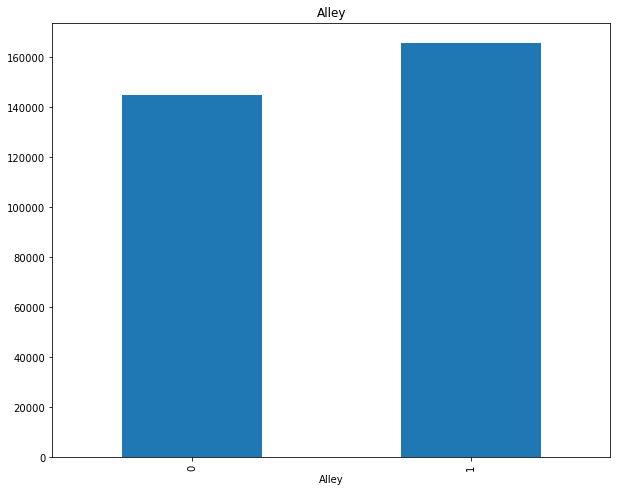

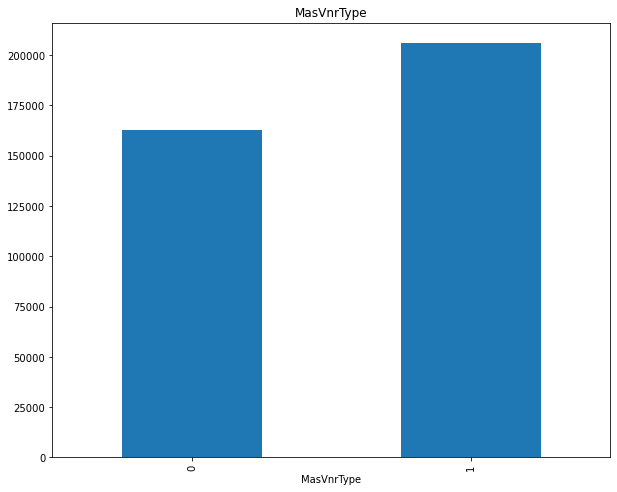

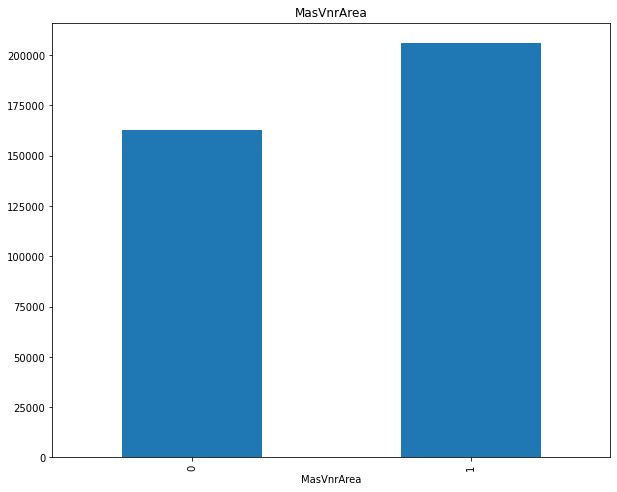

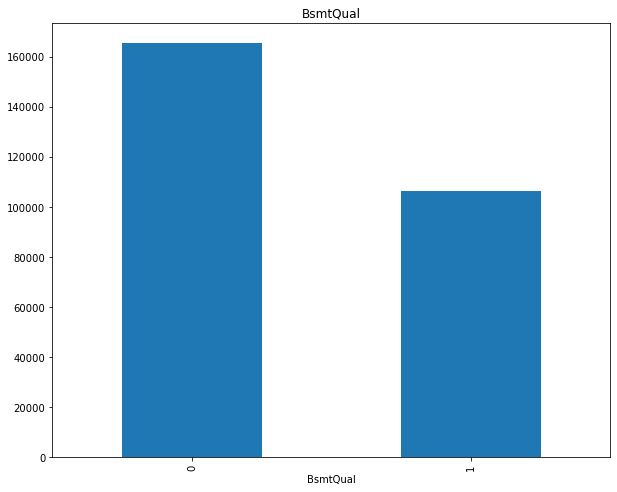

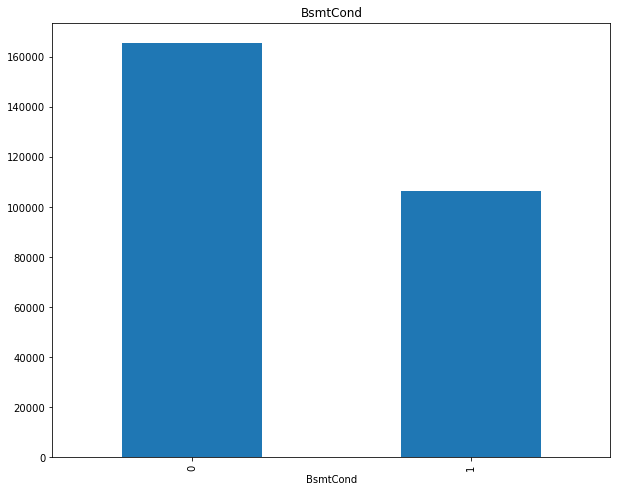

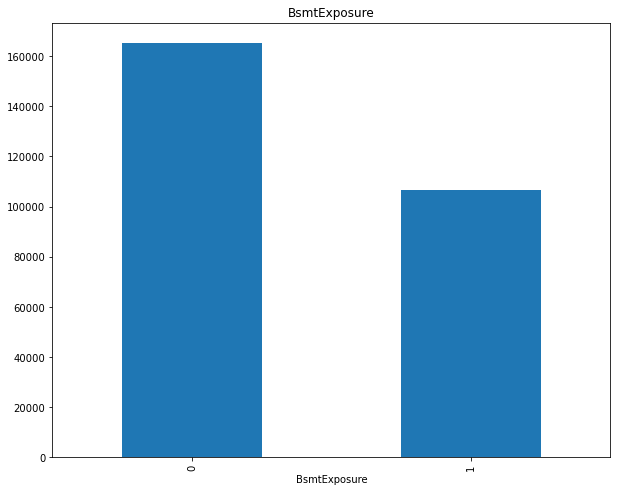

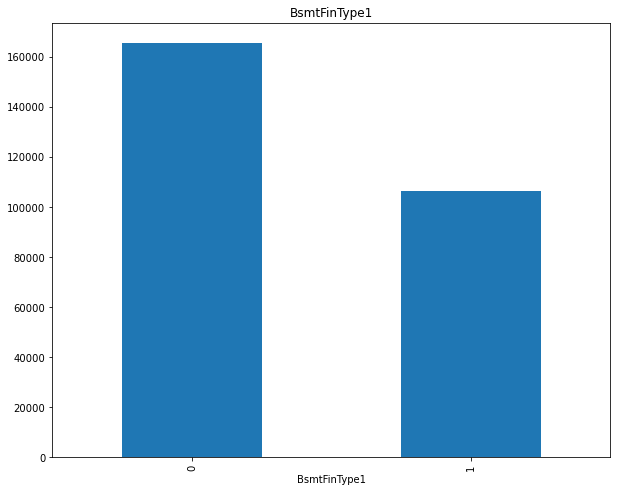

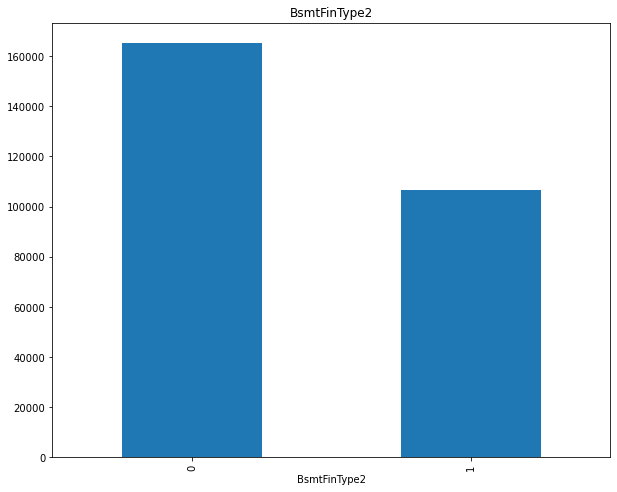

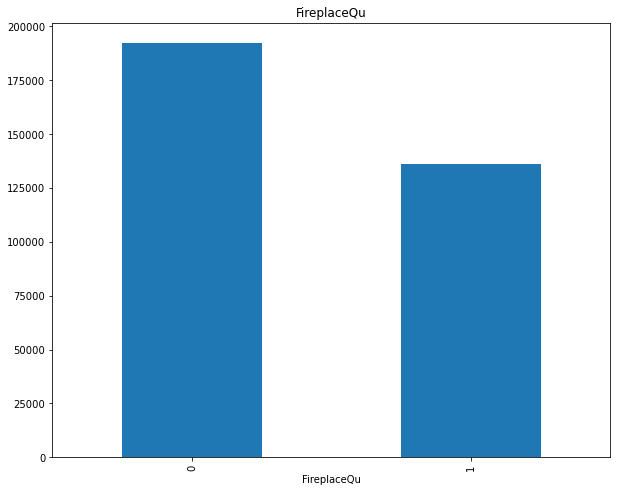

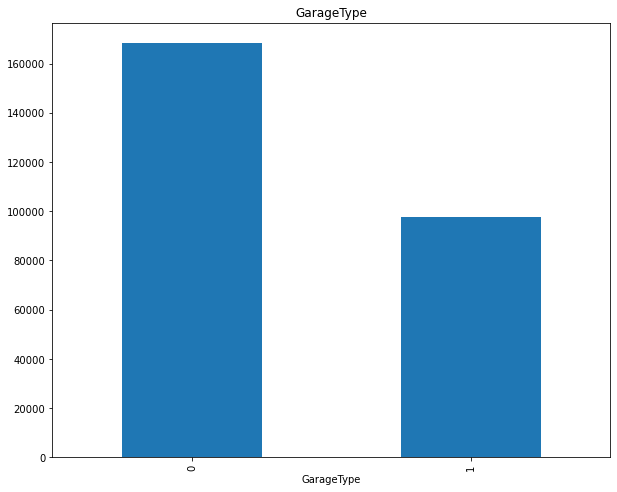

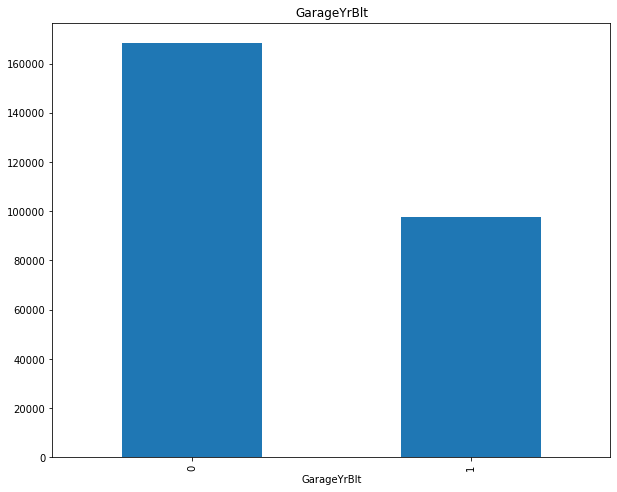

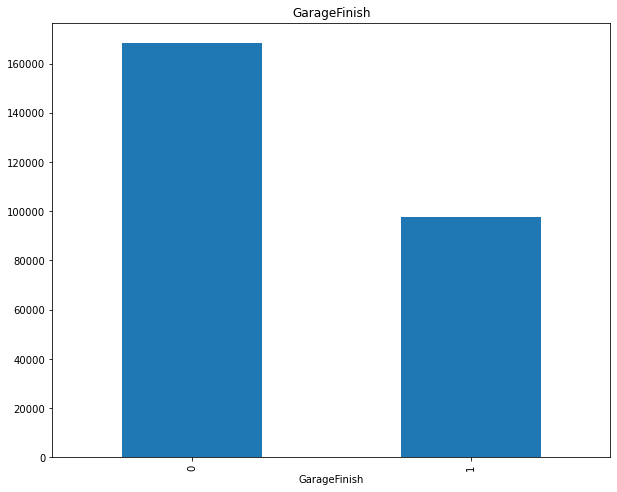

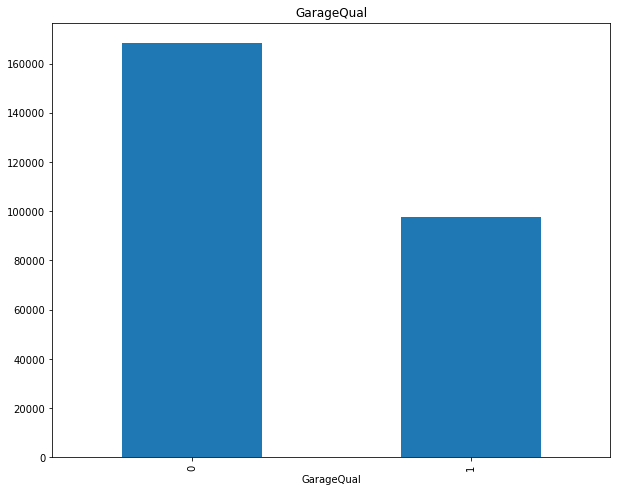

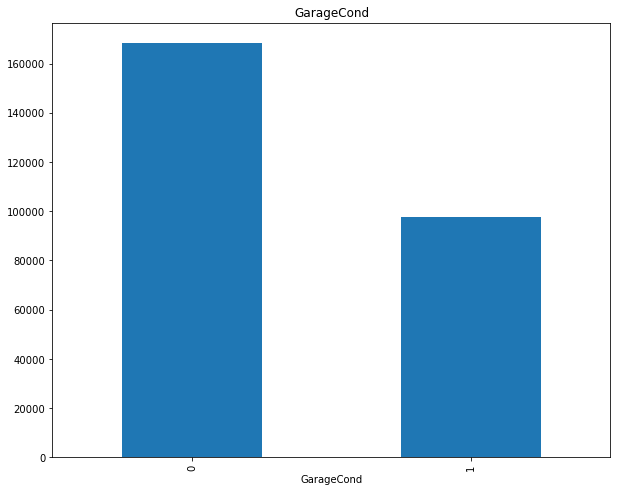

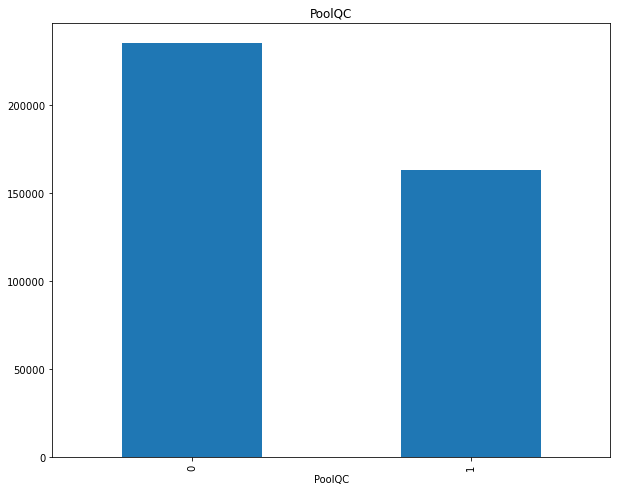

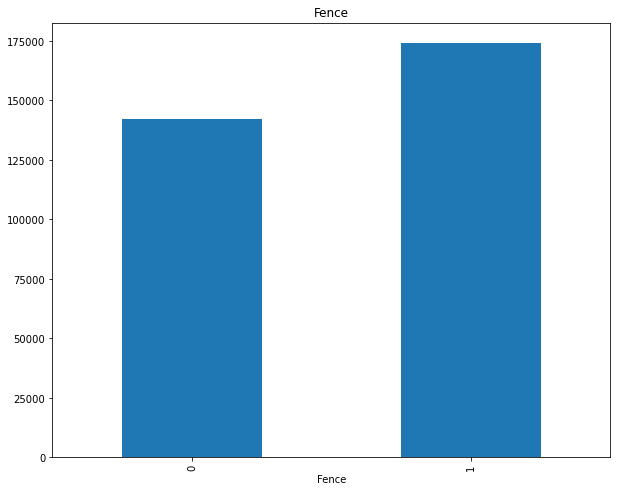

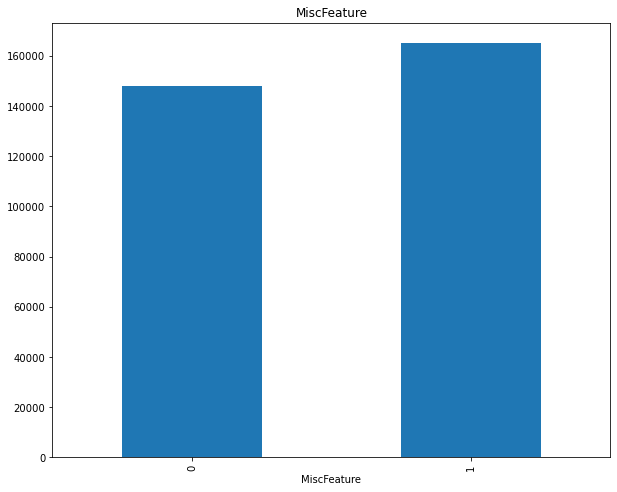

In [7]:
for feature in features_with_na:
    data = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [8]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Text(0.5, 1.0, 'House Price vs YearSold')

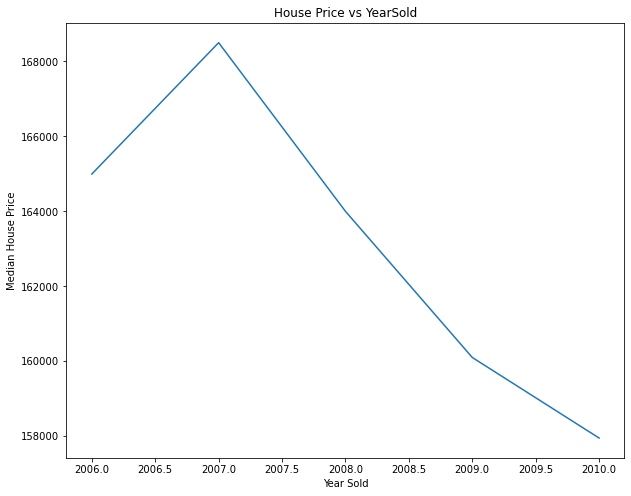

In [9]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")


In [10]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [11]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [13]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [65]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


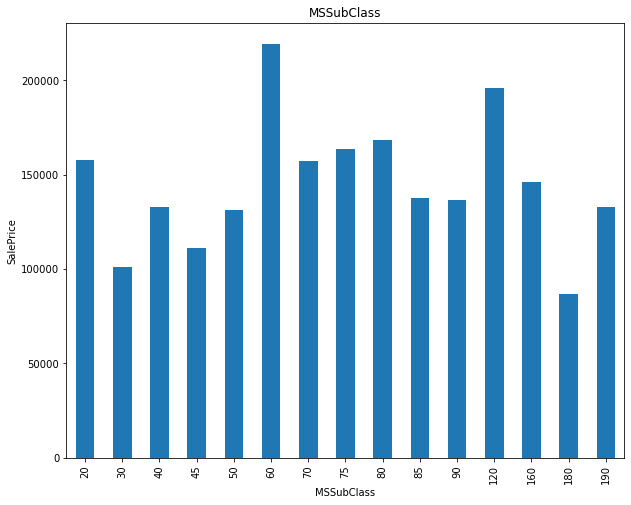

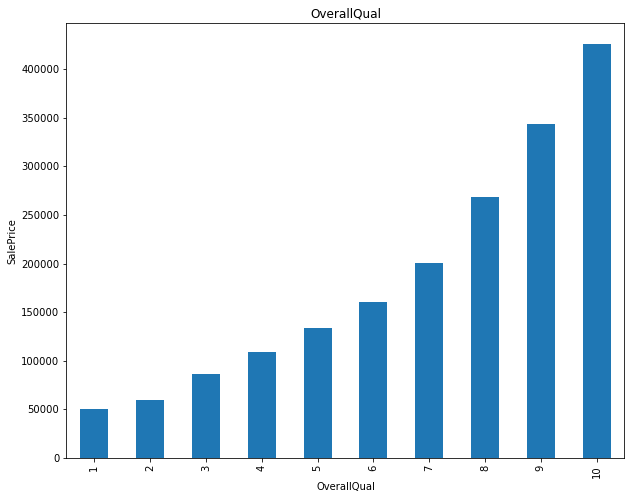

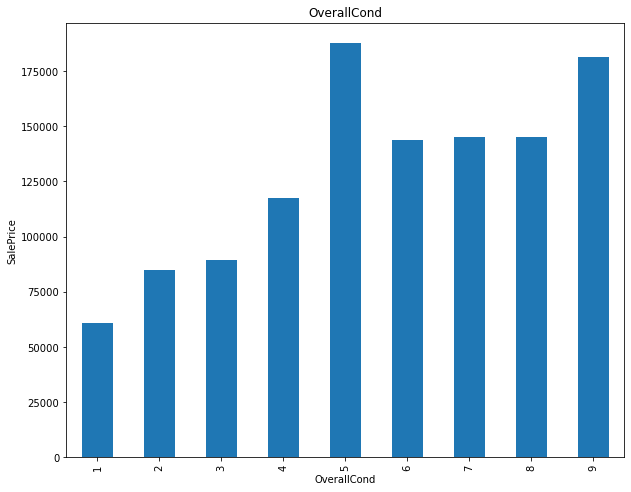

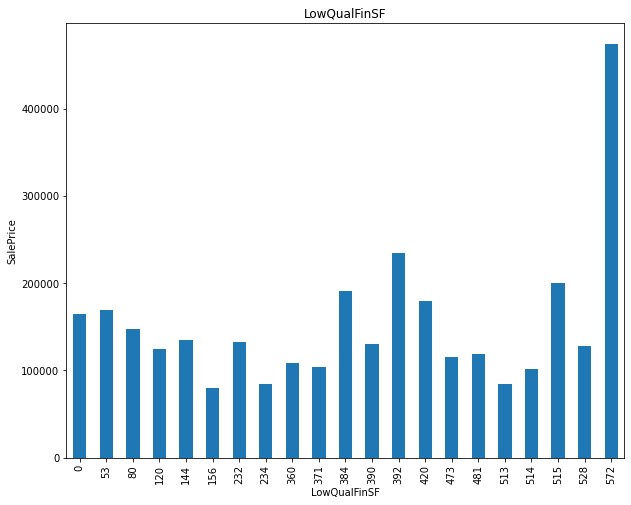

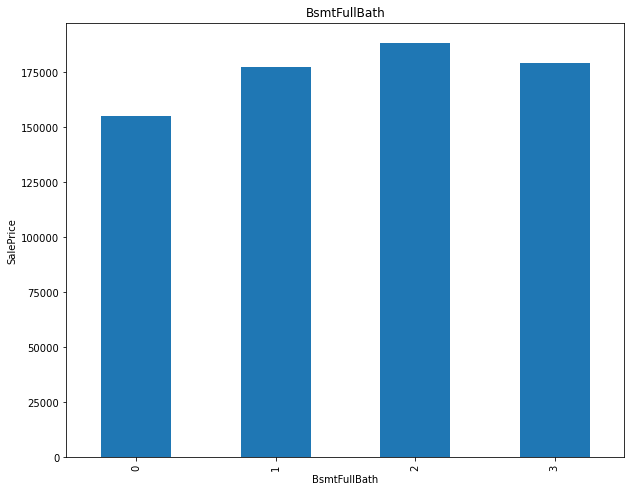

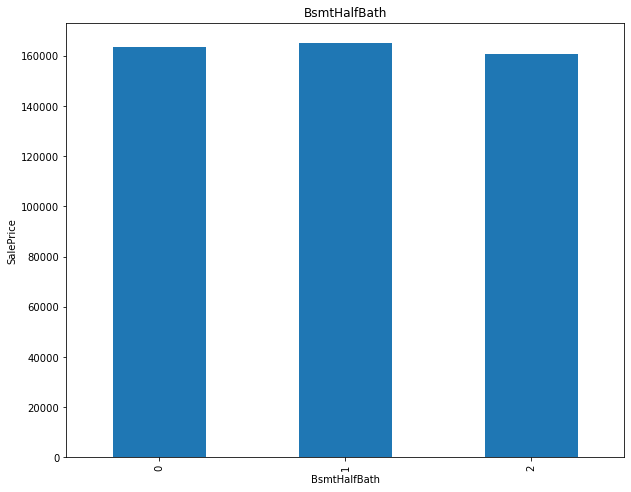

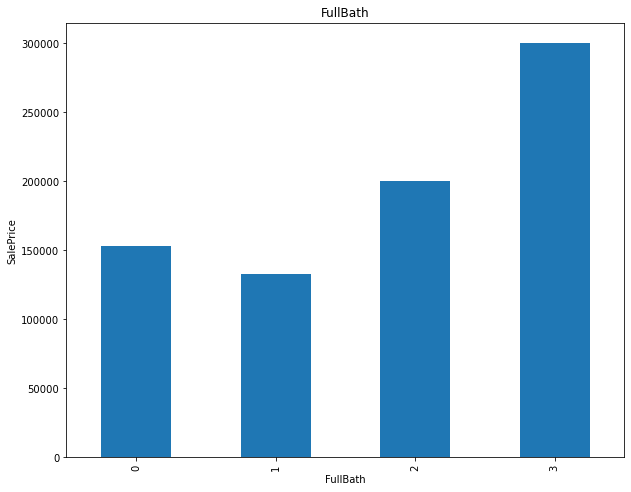

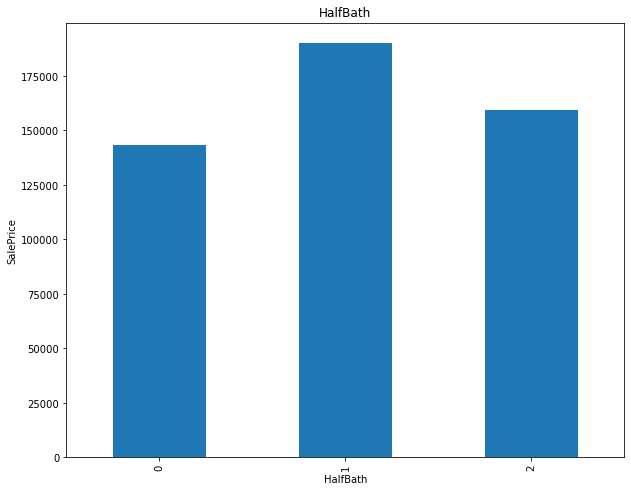

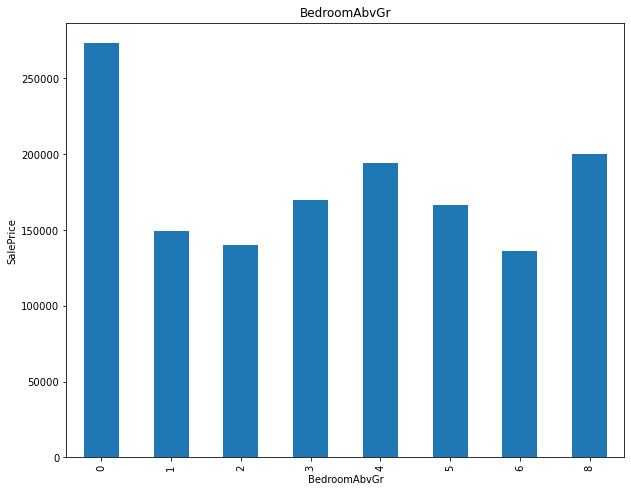

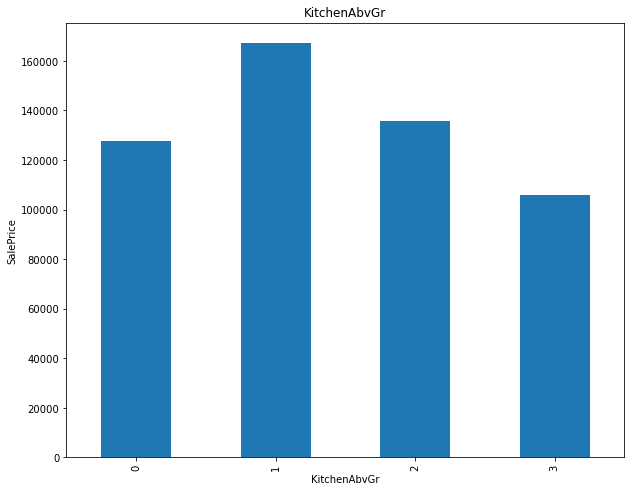

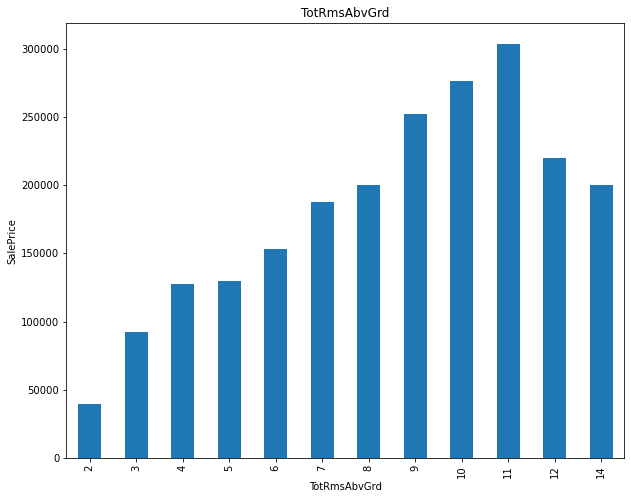

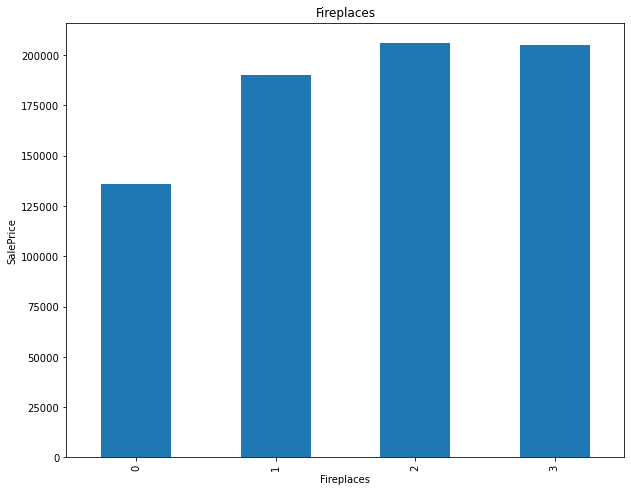

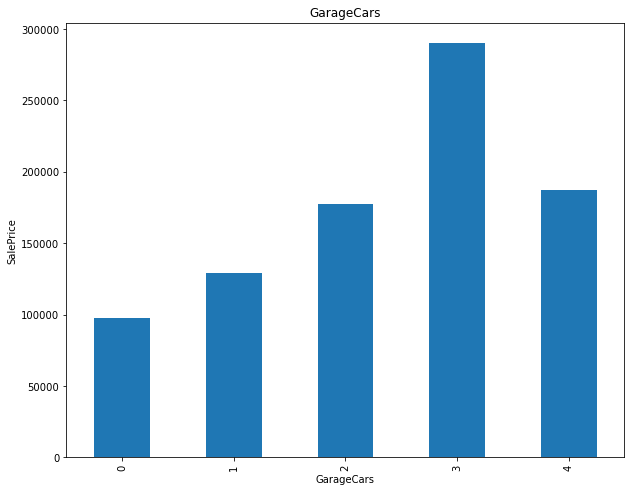

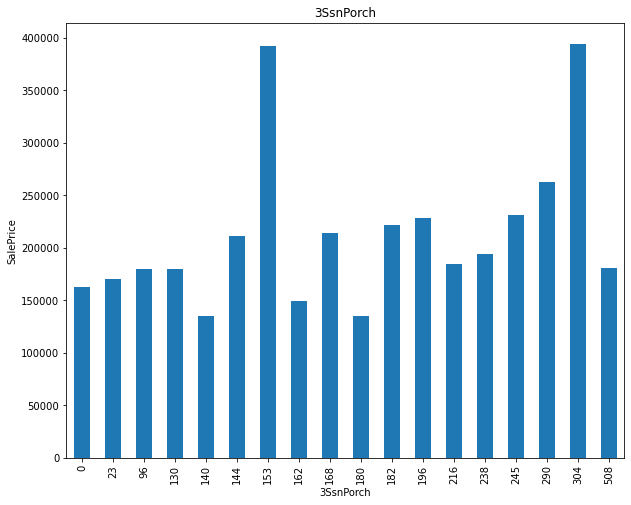

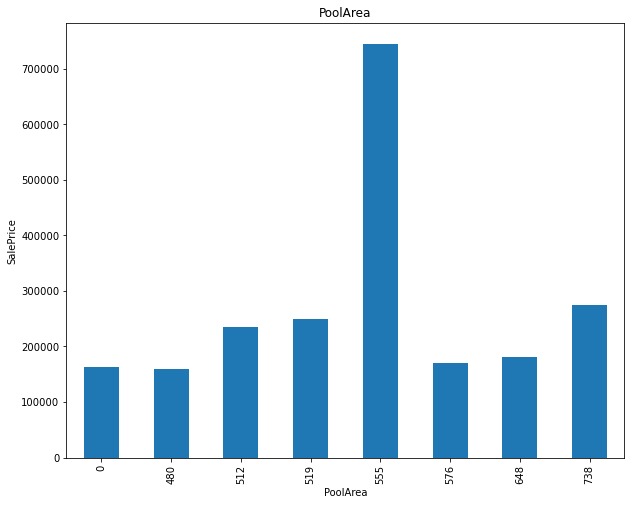

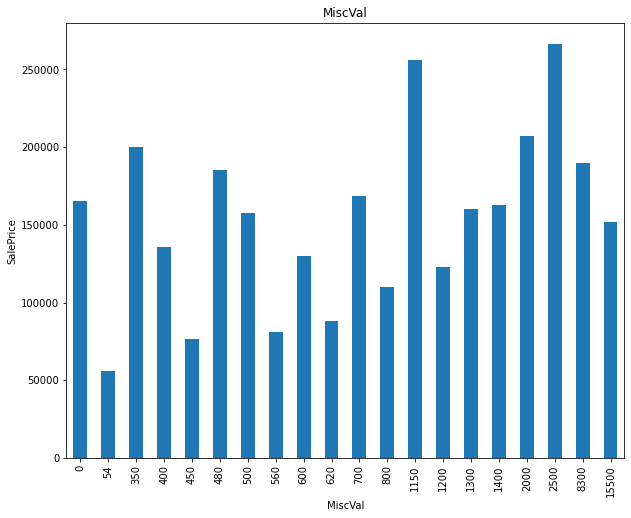

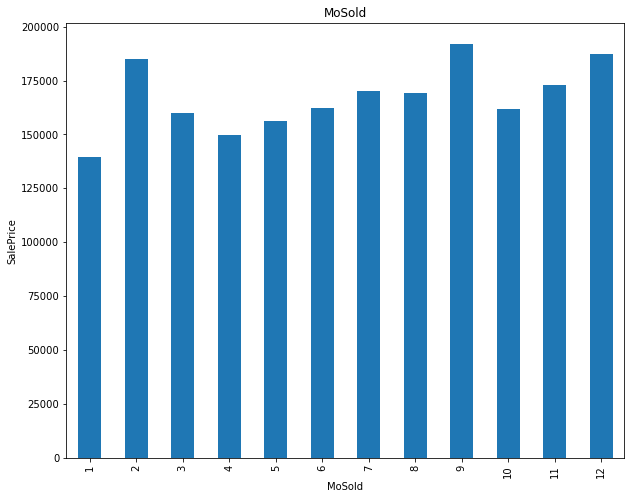

In [14]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [15]:
## There is a relationship between variable number and SalePrice

Continuous Variable

In [16]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


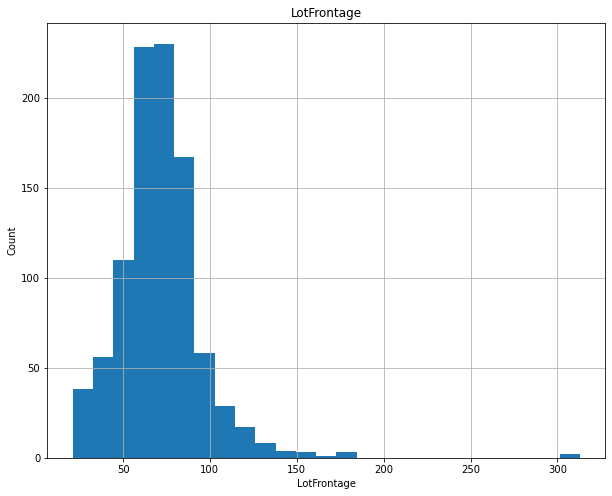

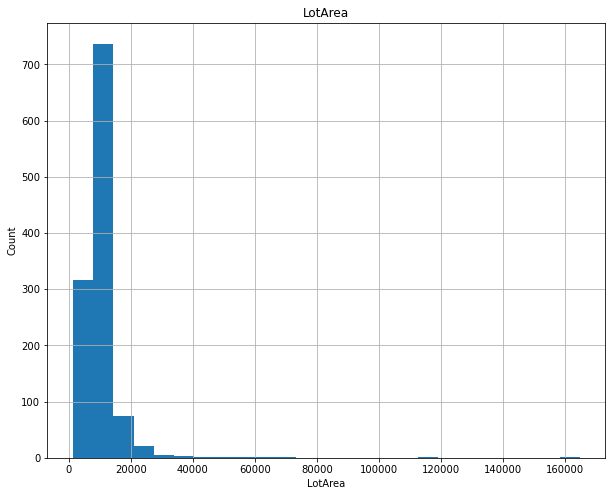

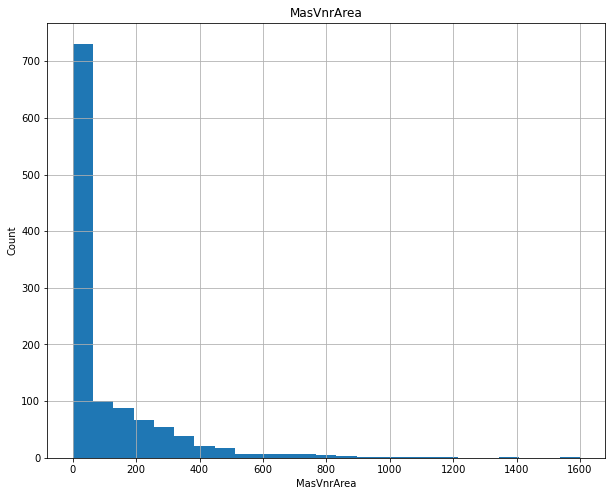

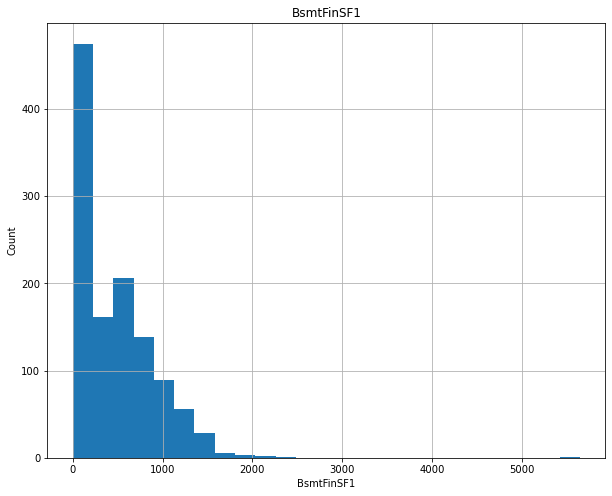

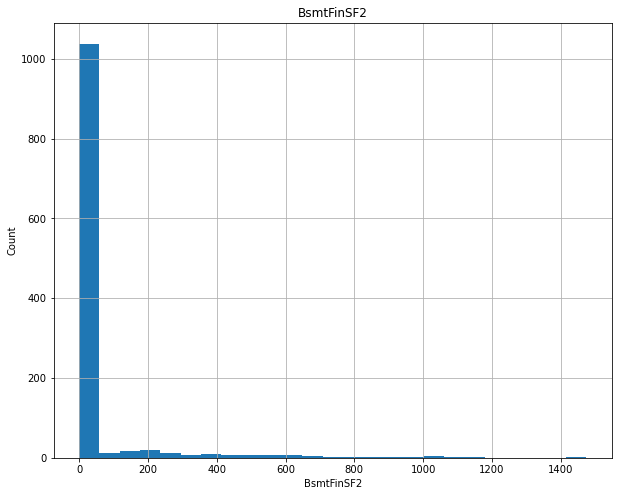

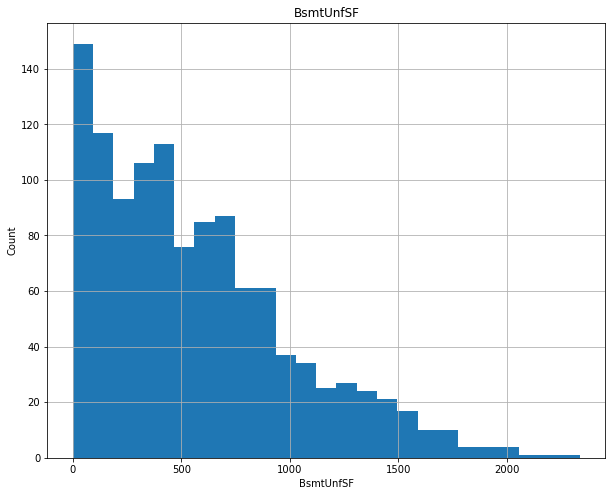

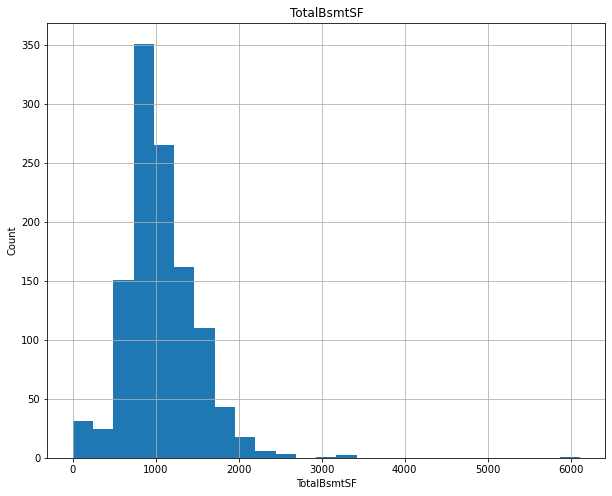

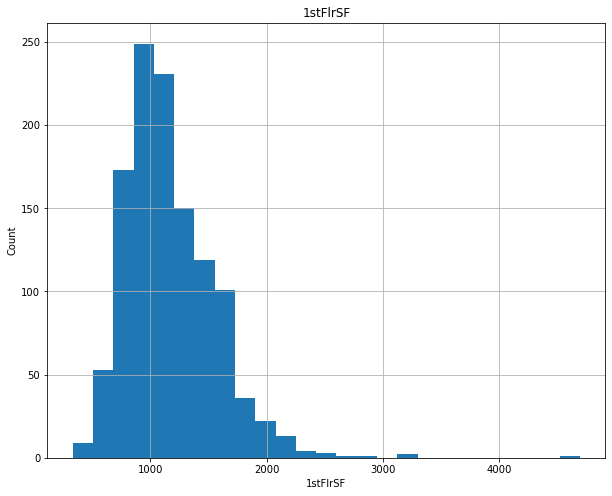

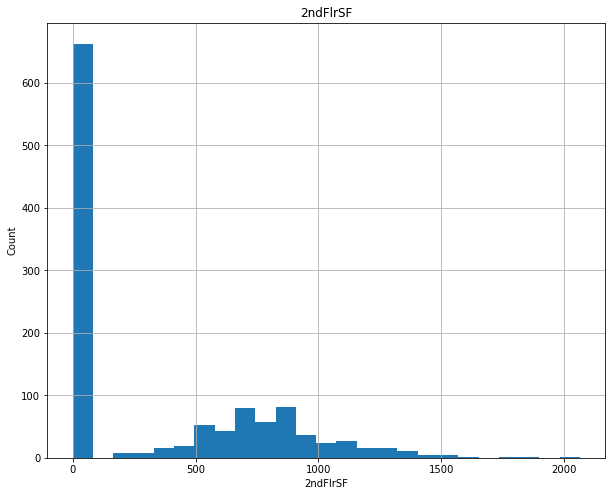

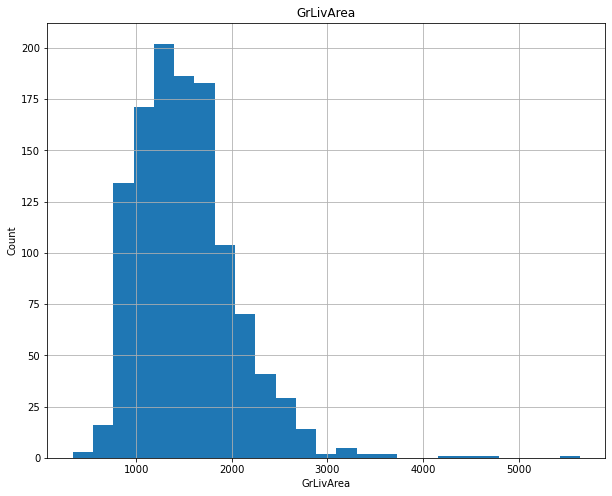

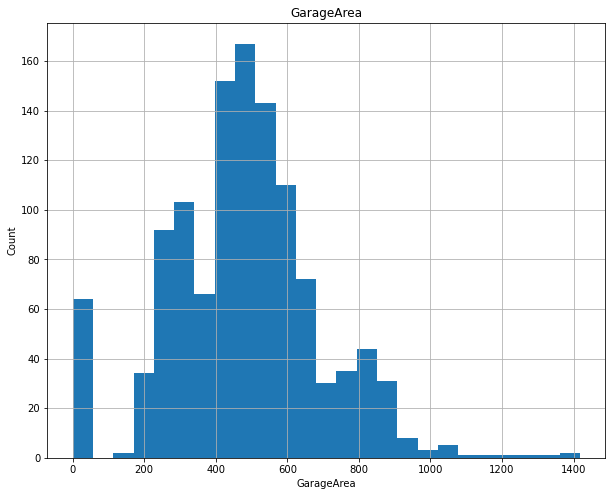

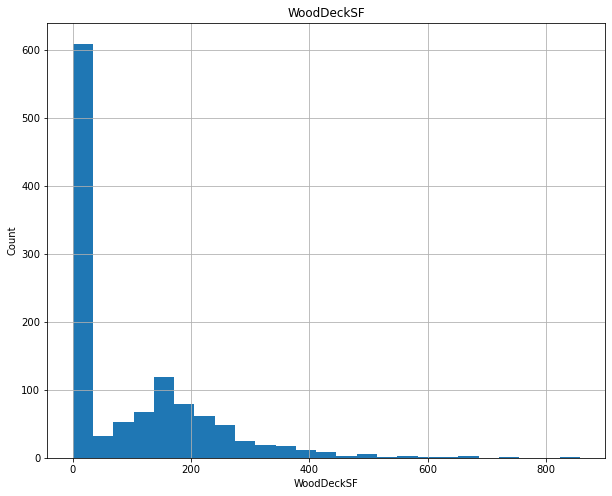

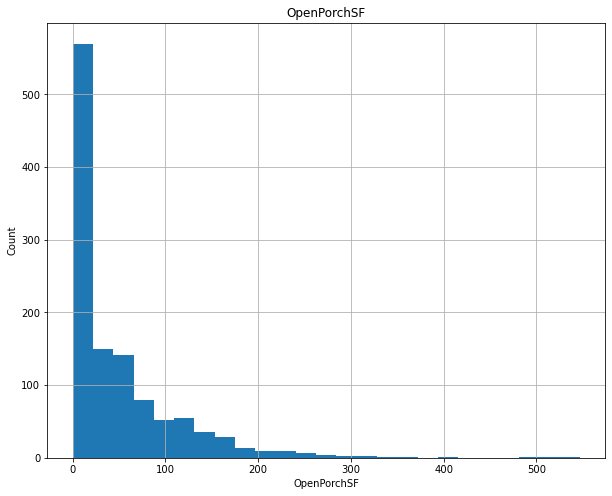

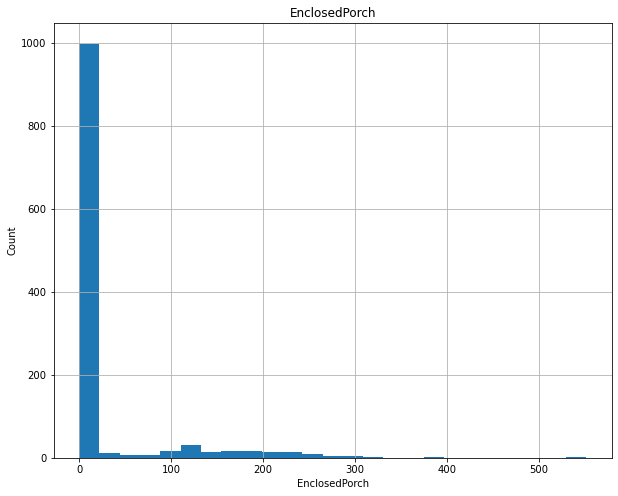

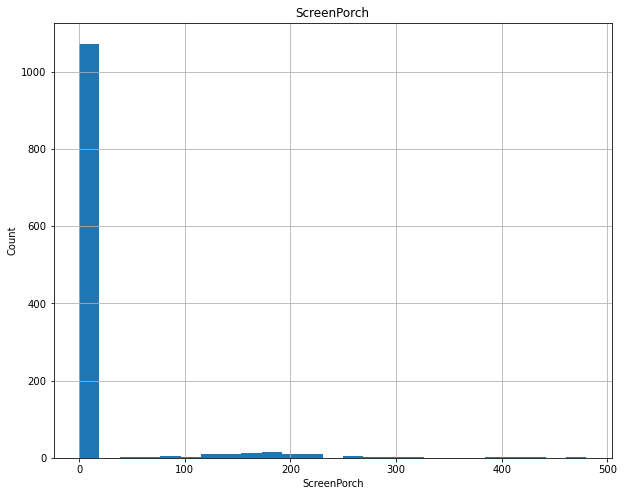

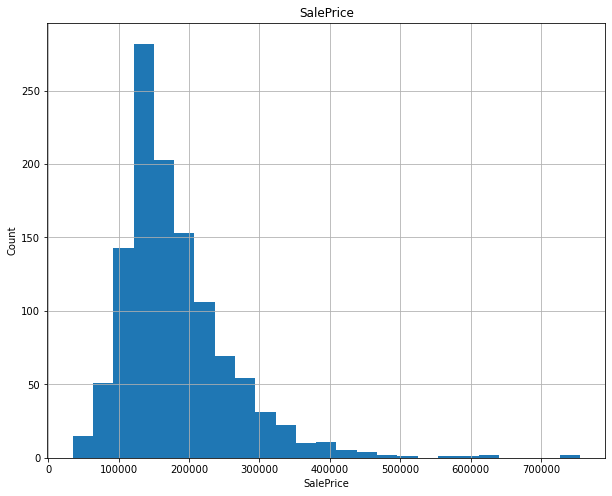

In [17]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


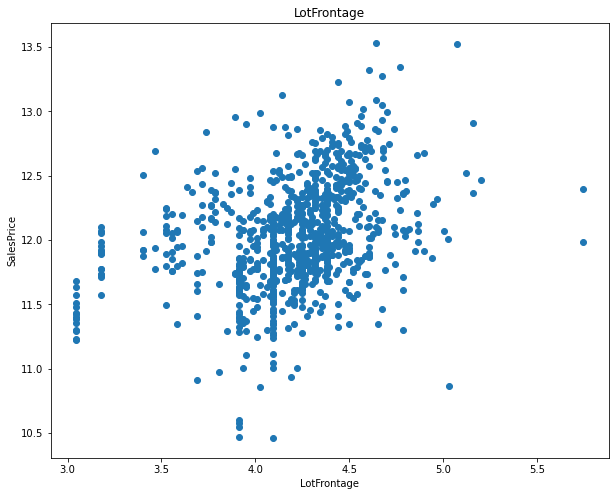

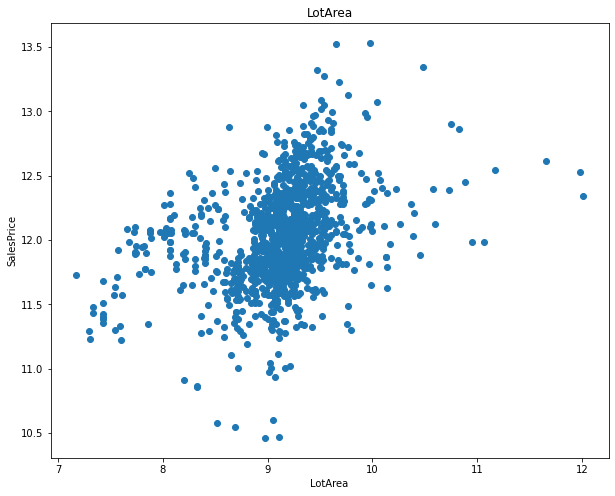

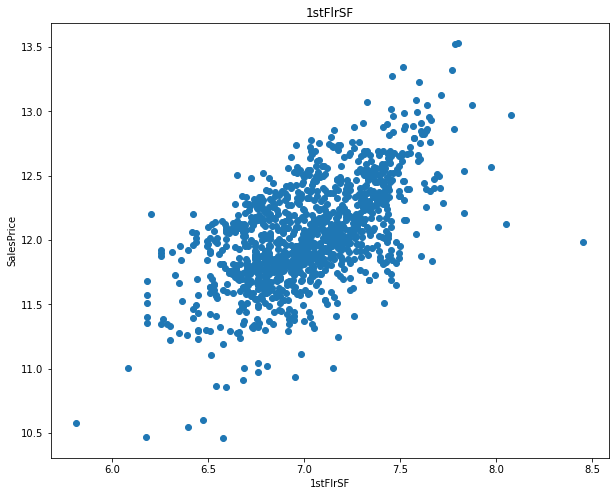

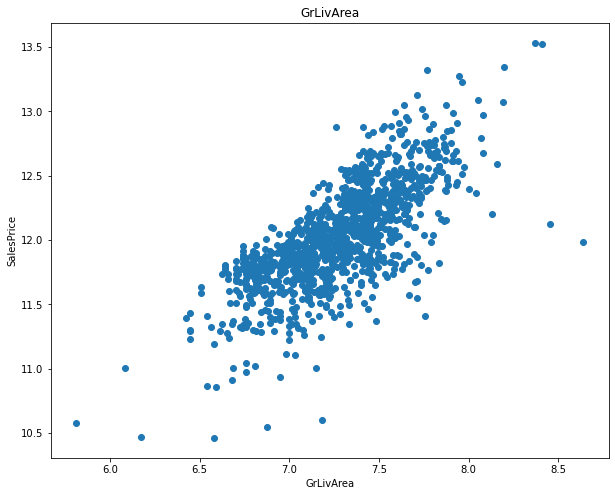

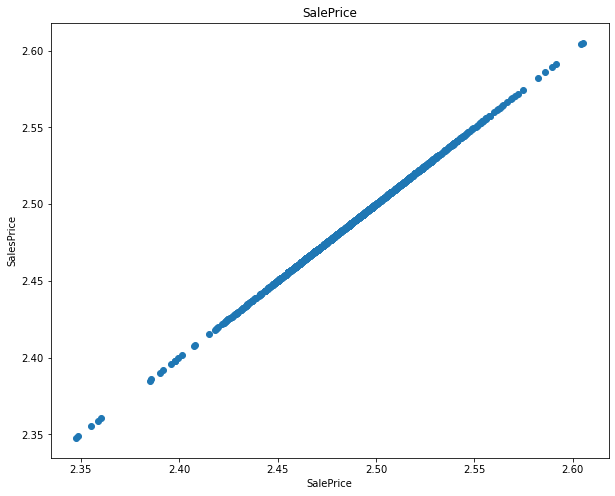

In [18]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

# Outliers

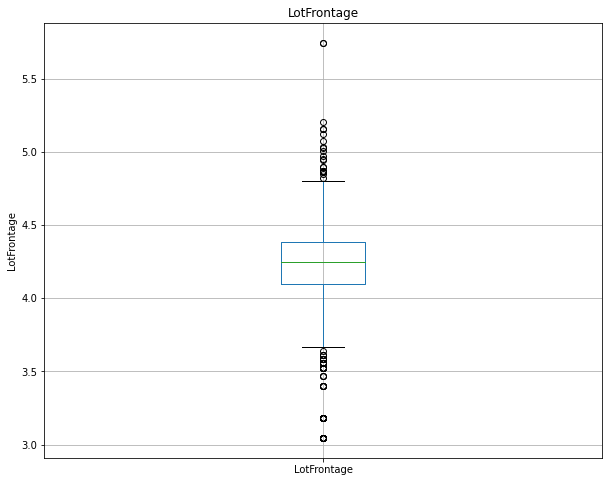

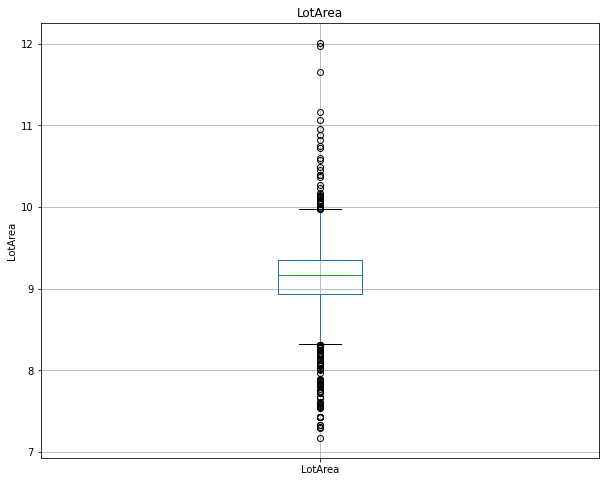

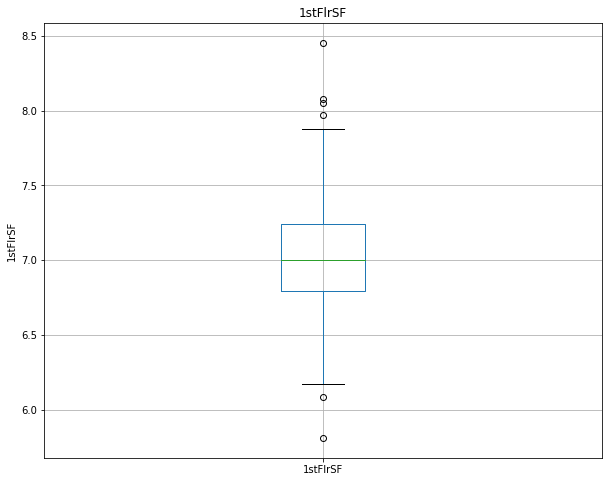

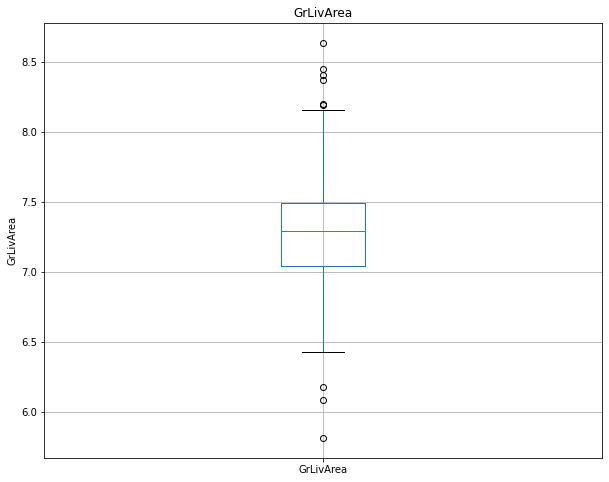

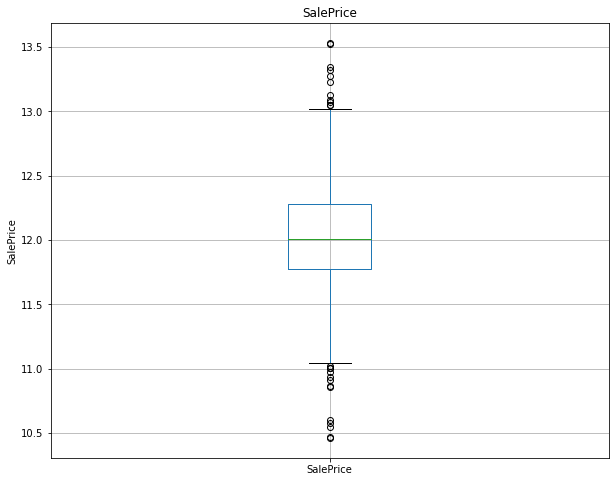

In [19]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# Categorical Variables

In [68]:
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [69]:
df[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,...,Gd,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,...,TA,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,COD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal


In [71]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 13
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of categories are 4
The feature is ExterQual and number of 

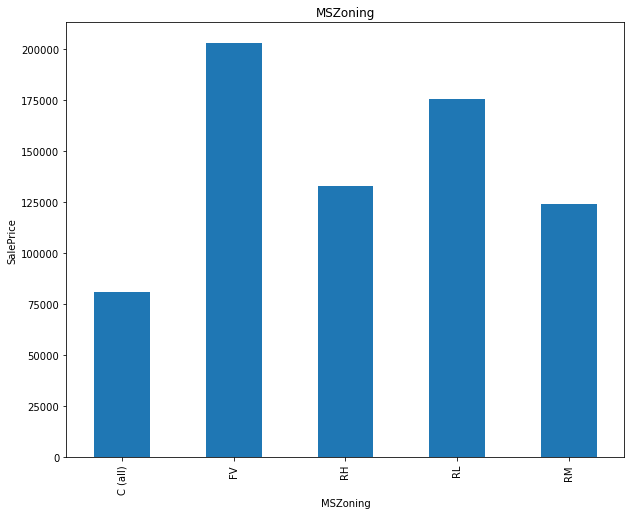

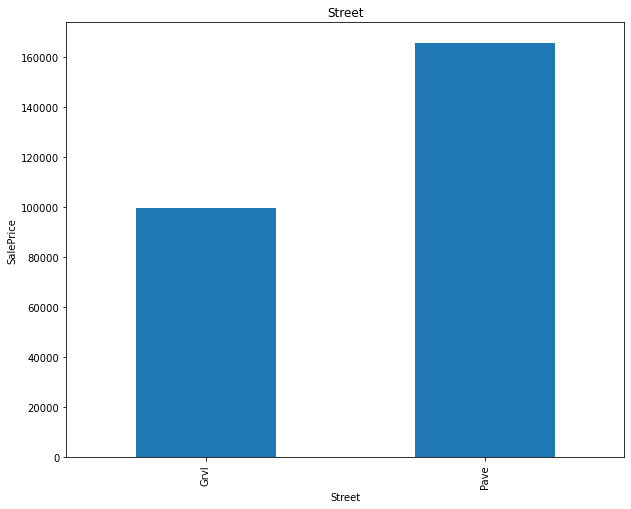

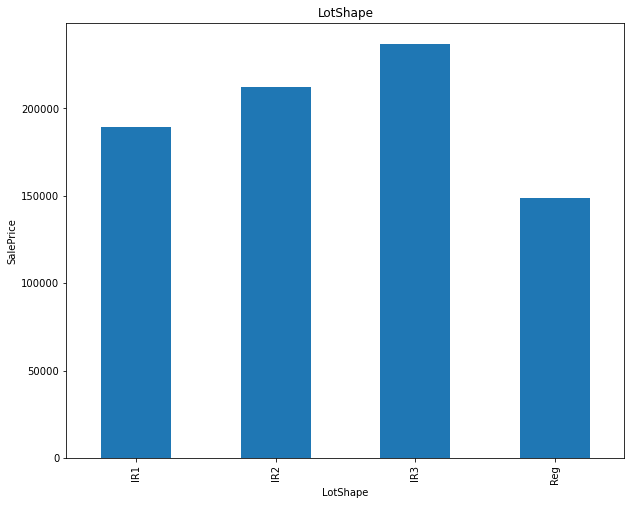

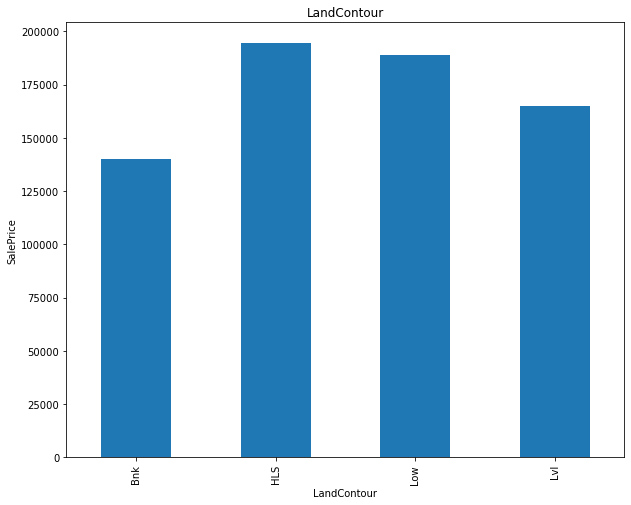

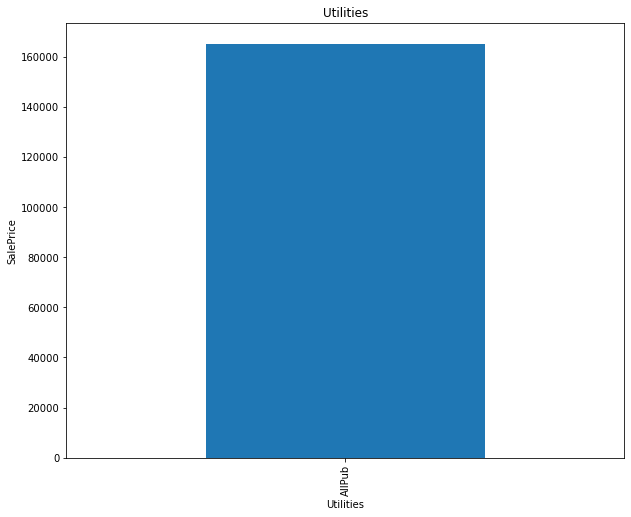

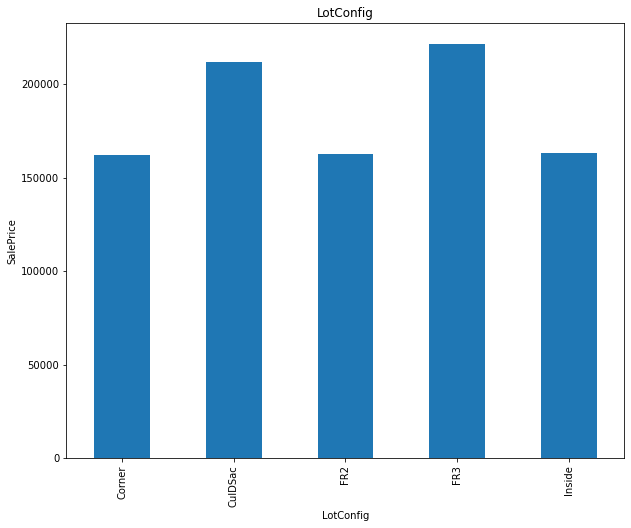

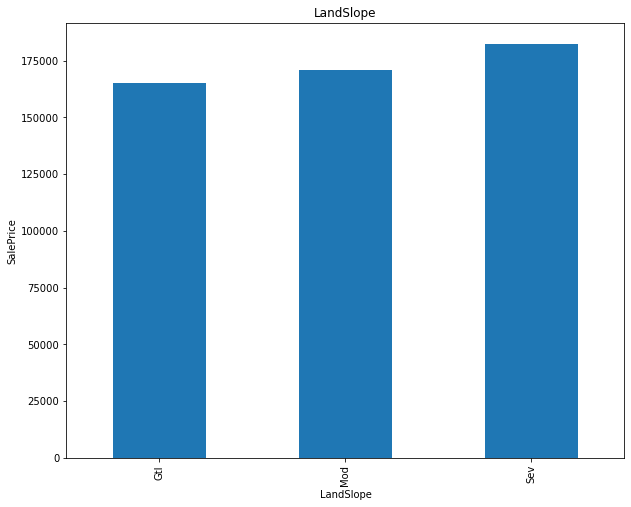

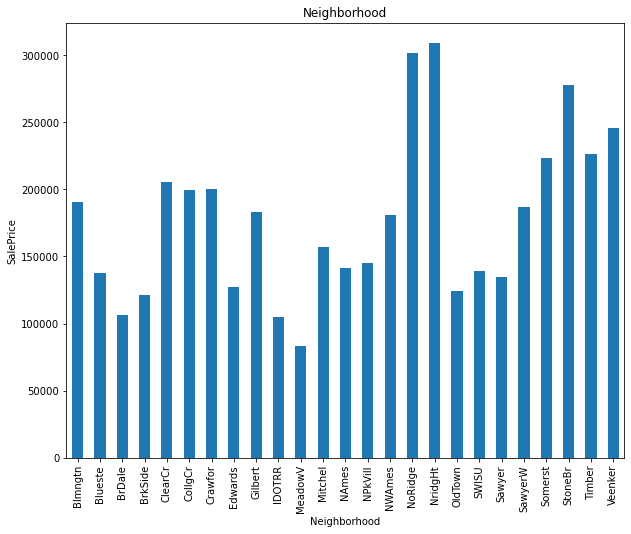

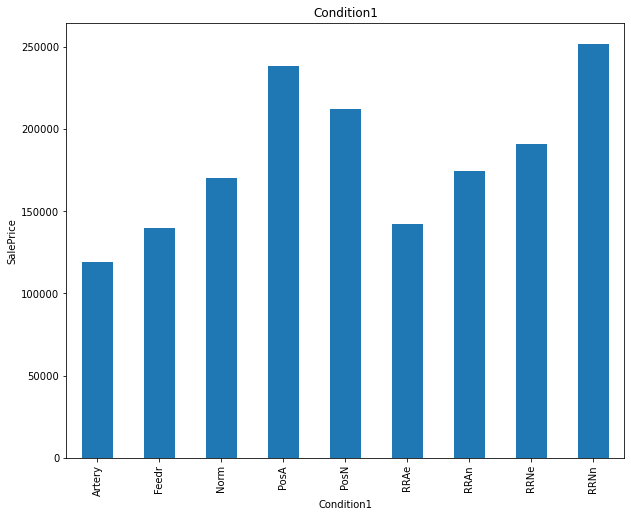

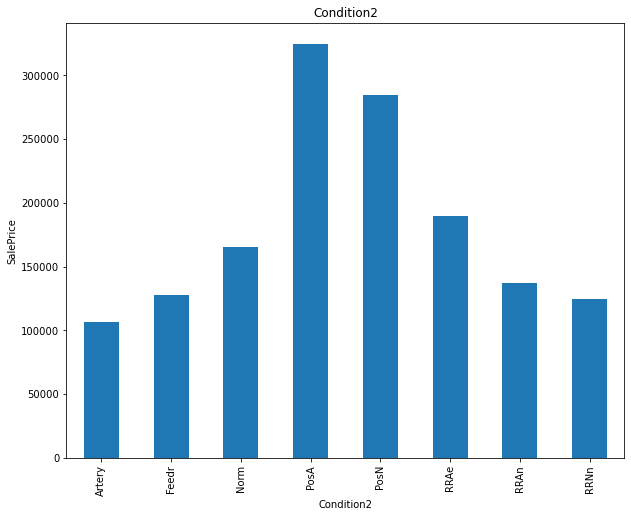

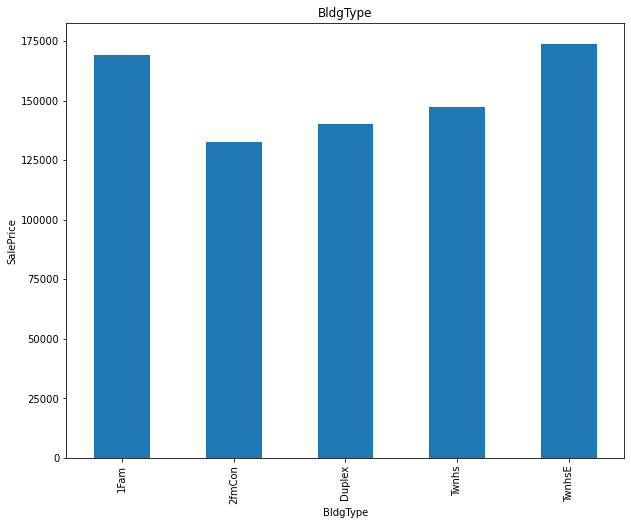

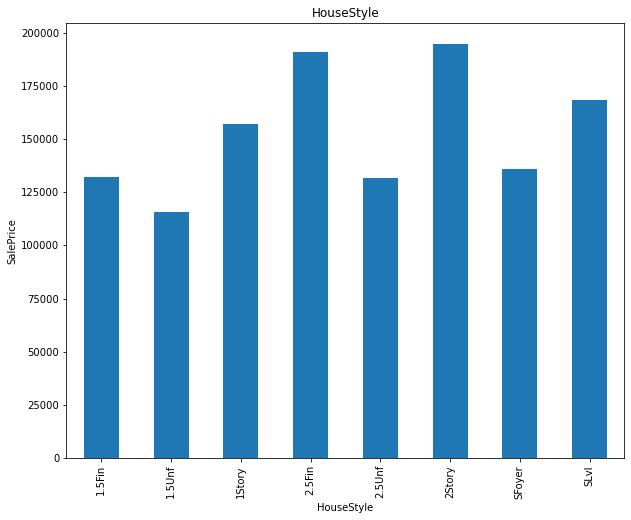

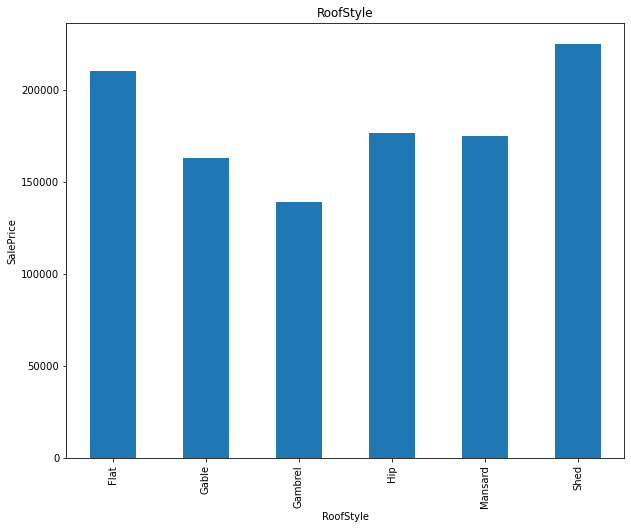

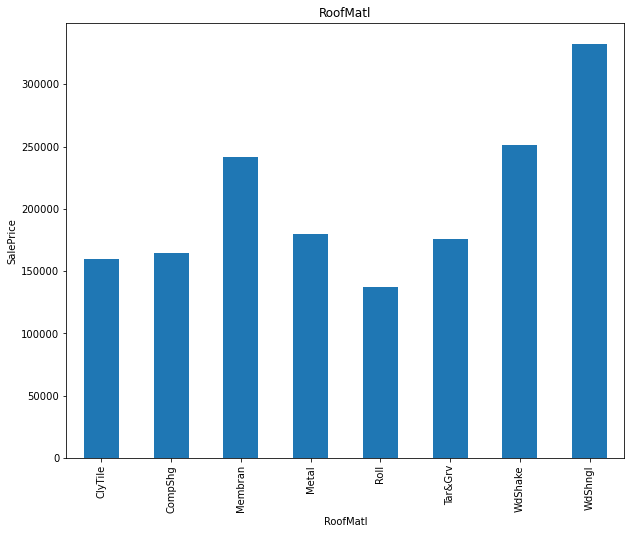

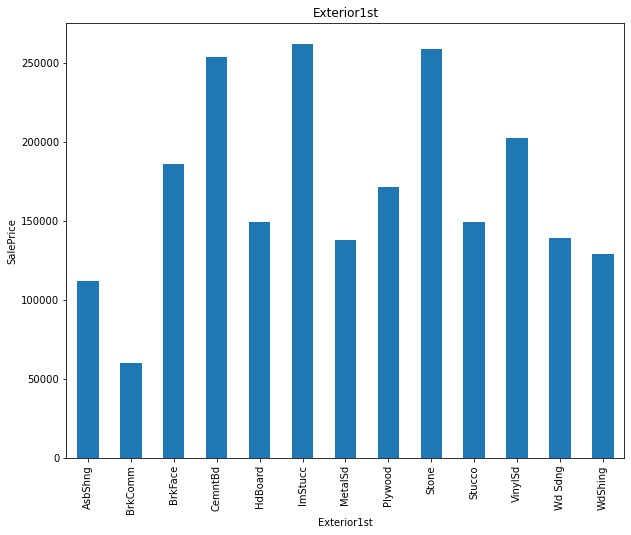

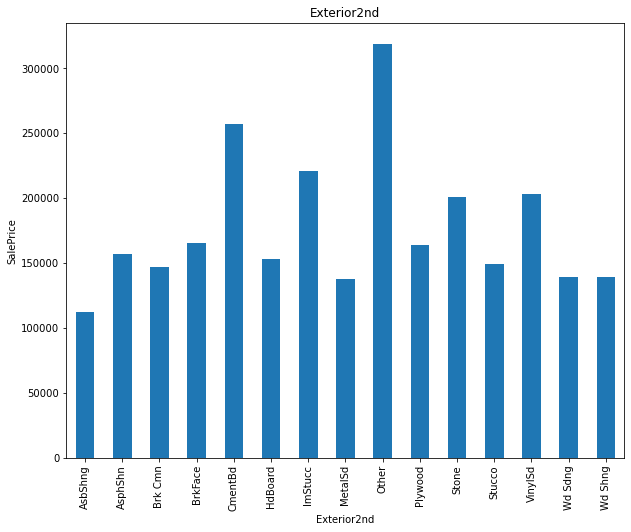

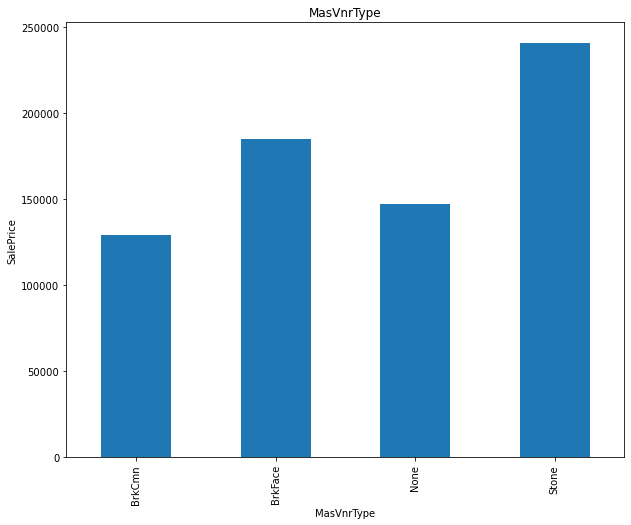

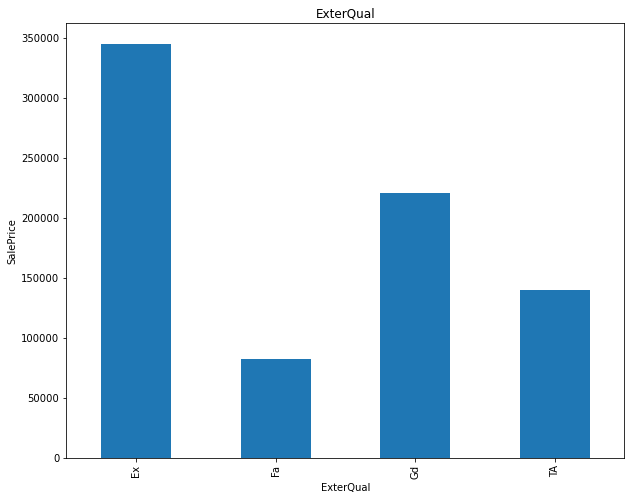

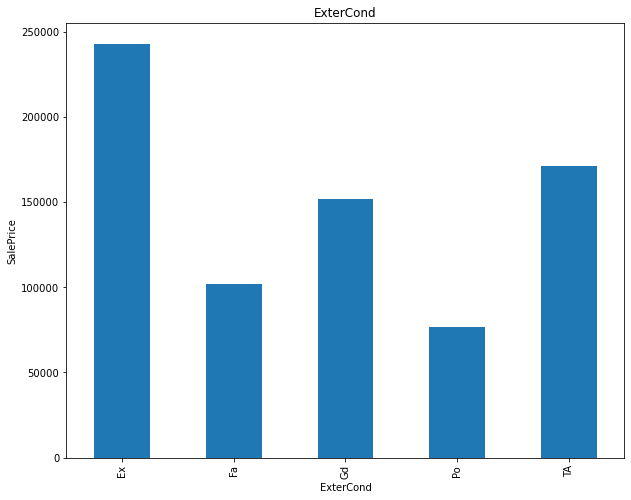

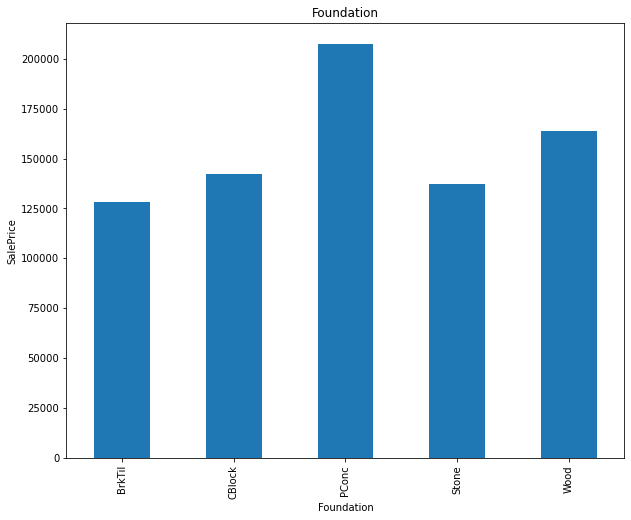

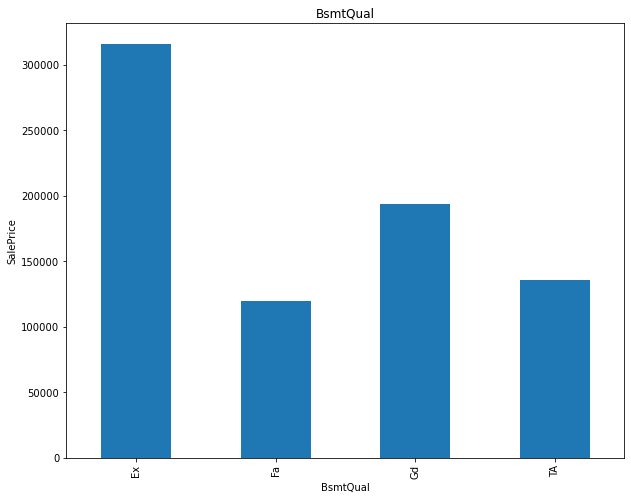

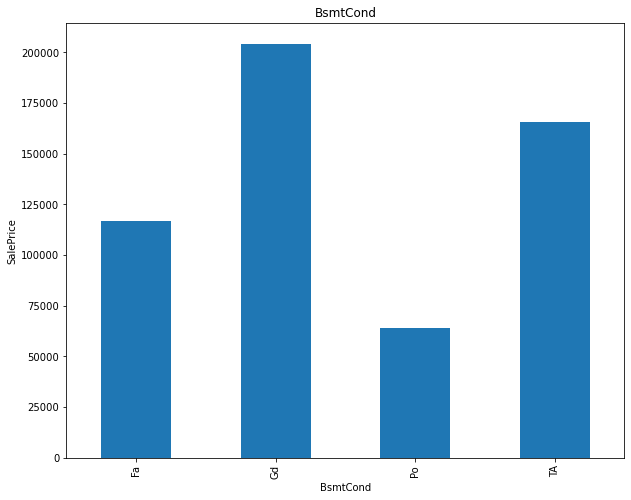

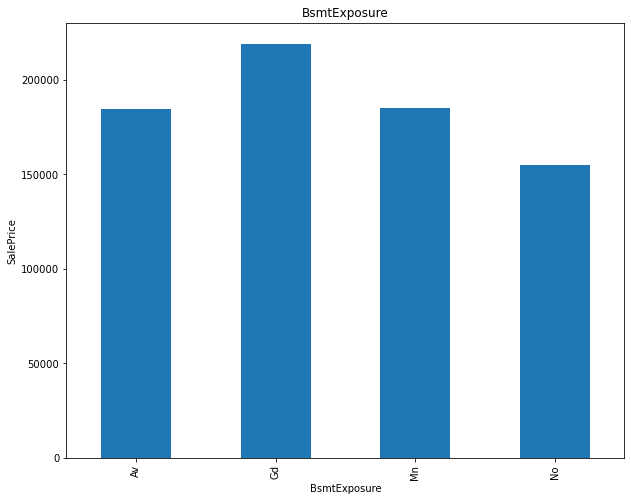

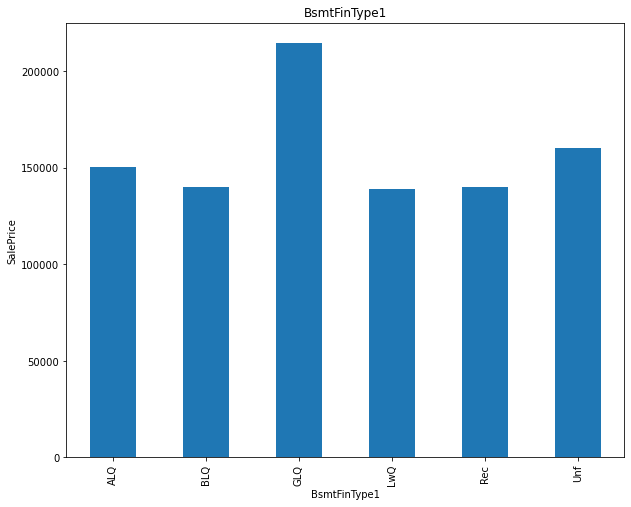

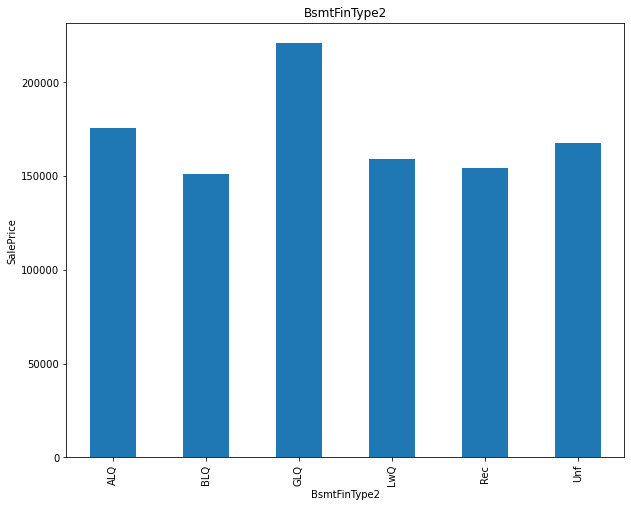

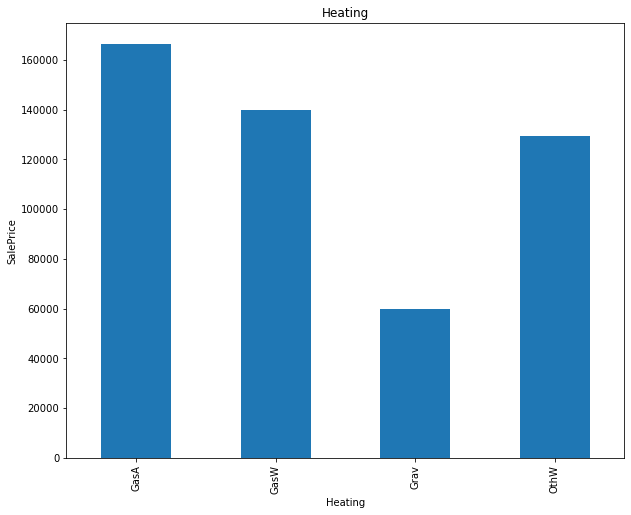

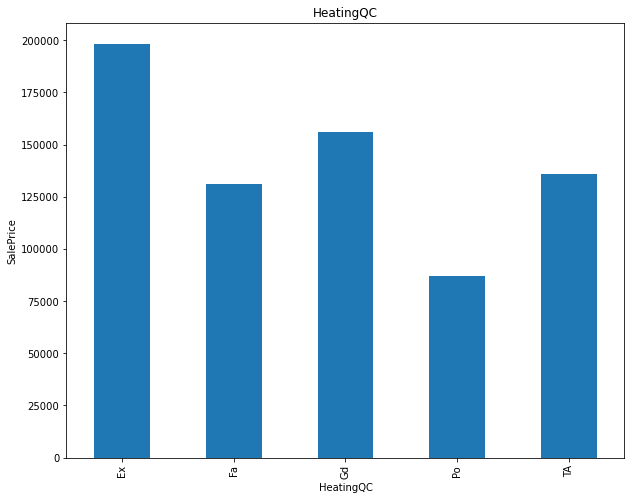

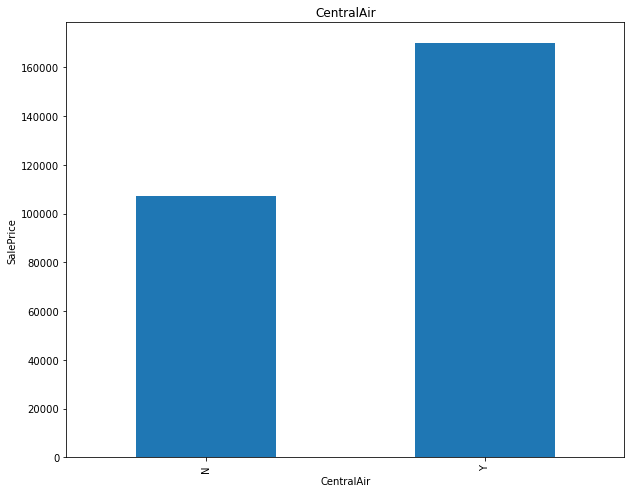

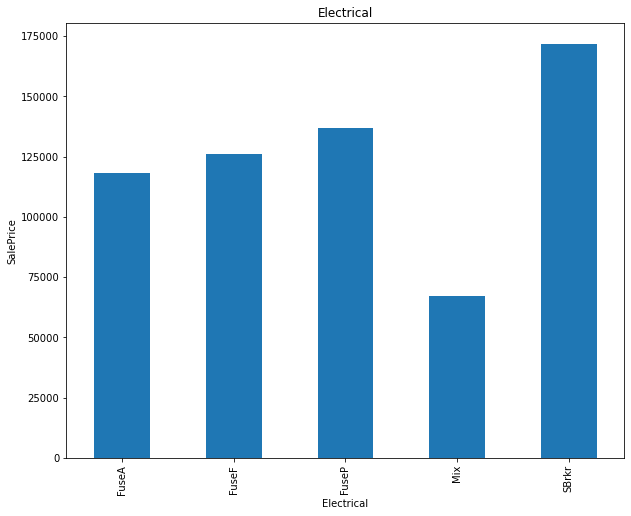

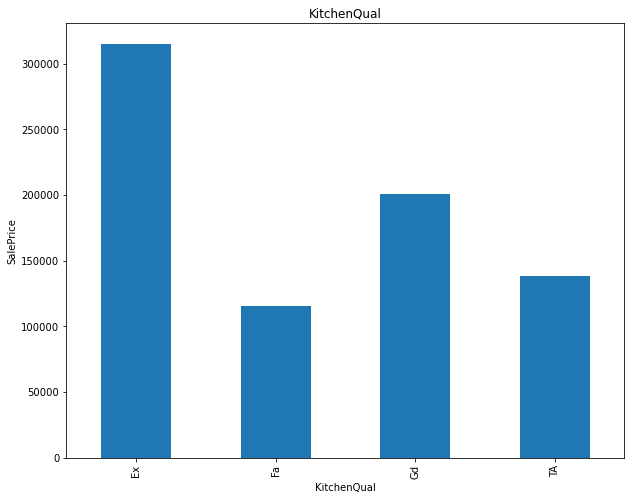

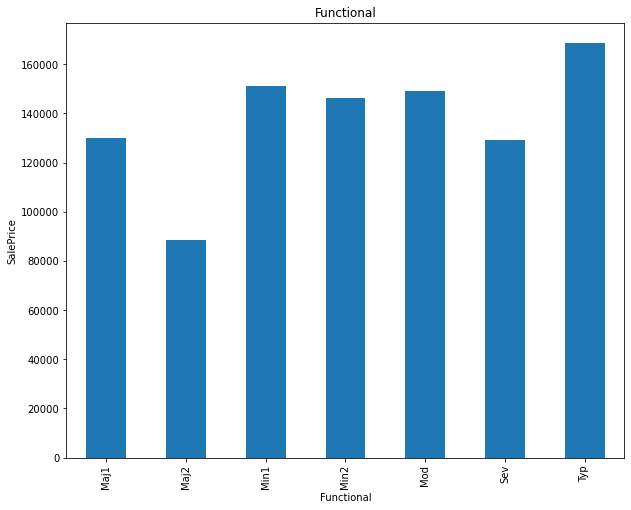

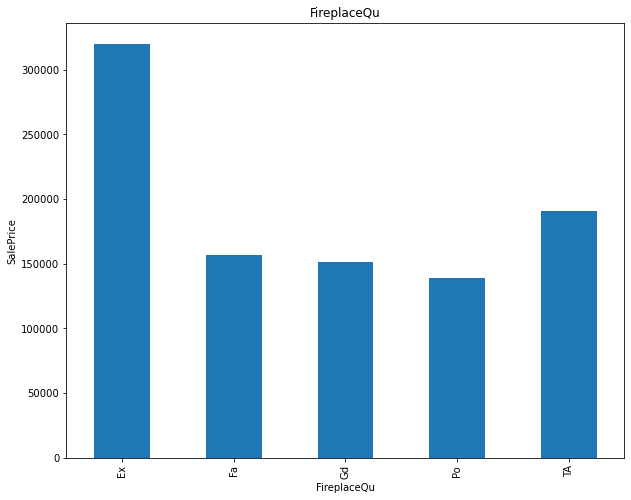

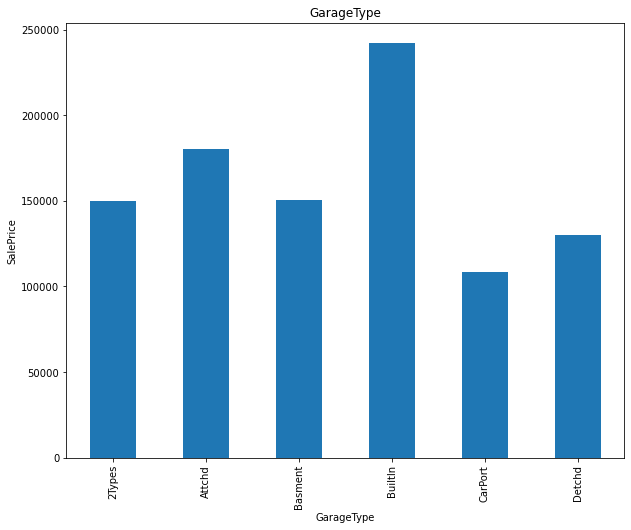

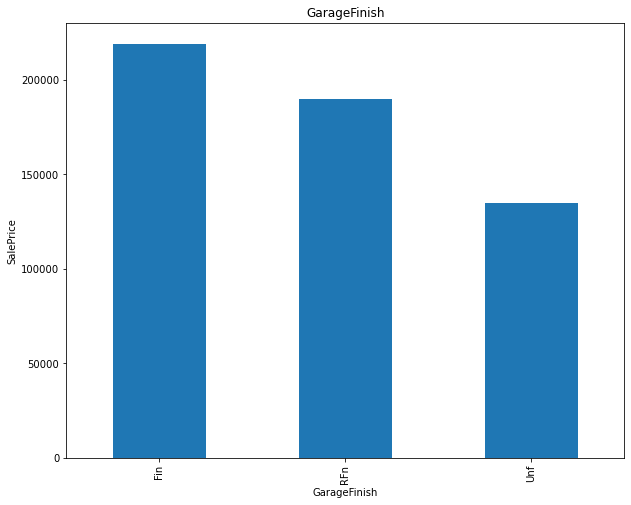

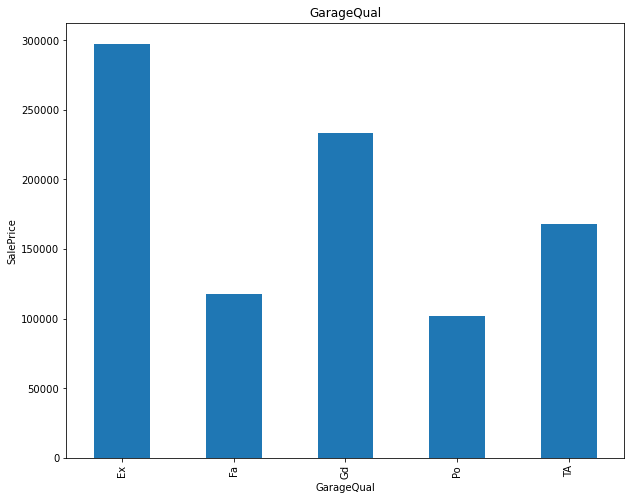

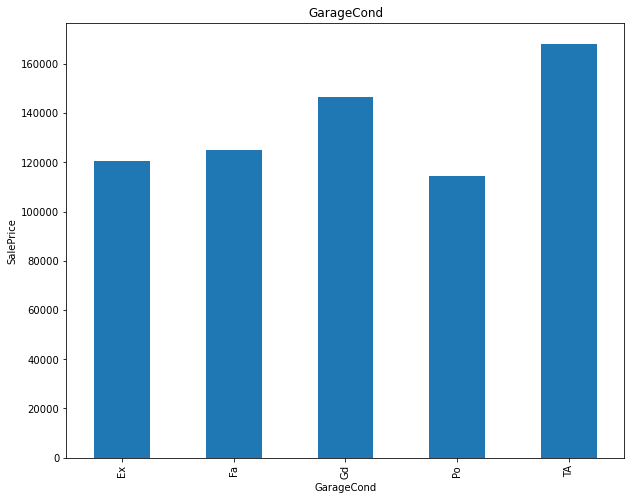

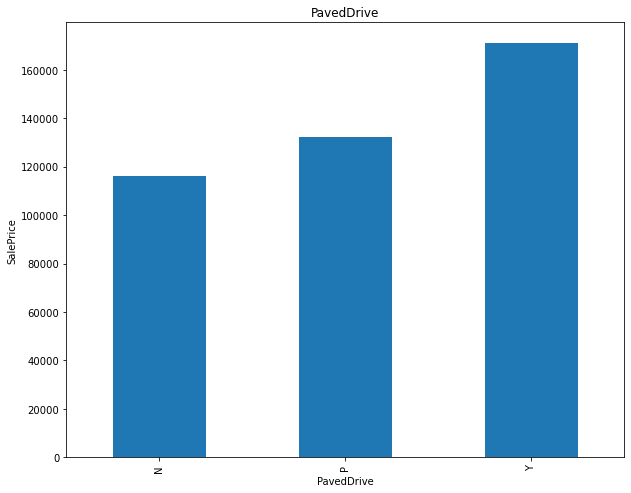

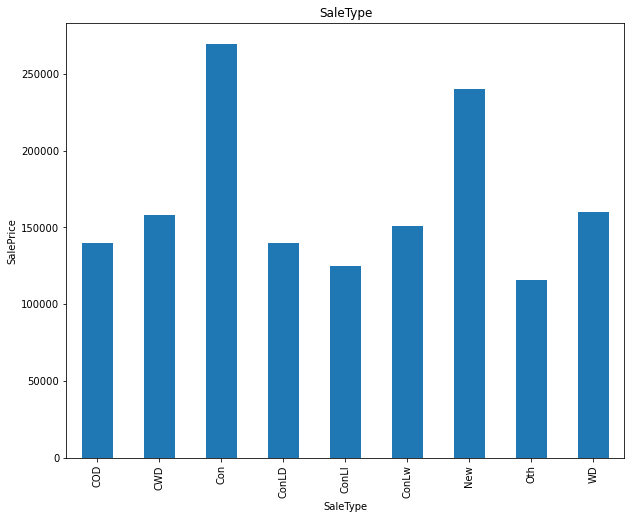

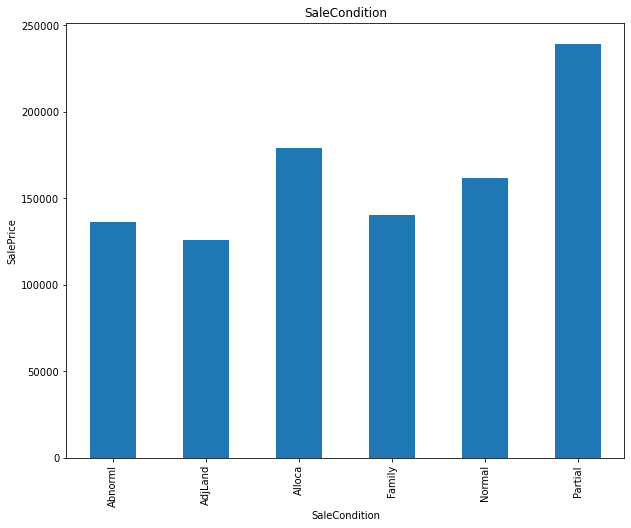

In [73]:
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [20]:
#fill missing values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [21]:
df.drop(['Alley'],axis=1,inplace=True)

In [22]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [23]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [24]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [25]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [26]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [27]:
df.shape

(1168, 76)

In [28]:
df.drop(['Id'],axis=1,inplace=True)

In [29]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

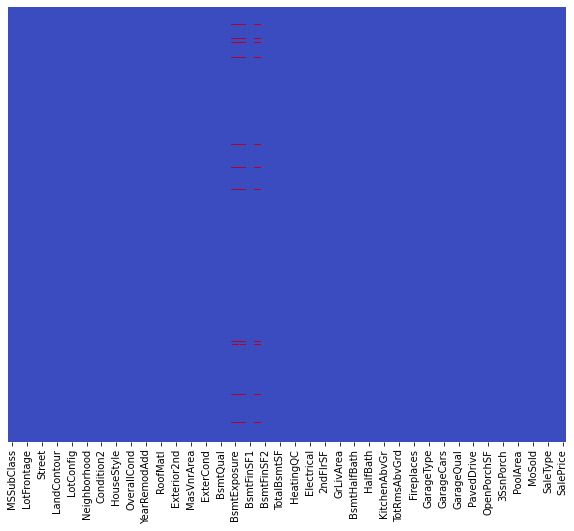

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [31]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [32]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [33]:
df.dropna(inplace=True)

In [34]:
df.shape

(1138, 75)

In [35]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,120,RL,70.98847,4928,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2007,WD,Normal,128000
1,20,RL,95.00000,15865,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,224,0,0,10,2007,WD,Normal,268000
2,60,RL,92.00000,9920,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,6,2007,WD,Normal,269790
3,20,RL,105.00000,11751,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,1,2010,COD,Normal,190000
4,20,RL,70.98847,16635,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,6,2009,WD,Normal,215000


In [36]:
#Handle categorical features

In [37]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [38]:
len(columns)

39

In [39]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [40]:
main_df=df.copy()

In [41]:
test_df=pd.read_csv('formulatedtest111.csv')

In [42]:
test_df.shape

(292, 74)

In [43]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,86.000000,14157,Pave,IR1,HLS,AllPub,Corner,Gtl,...,51,0,0,0,0,0,7,2007,WD,Normal
1,120,RL,66.425101,5814,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,0,0,0,0,0,8,2009,COD,Abnorml
2,20,RL,66.425101,11838,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,151,0,0,0,0,0,6,2009,WD,Normal
3,70,RL,75.000000,12000,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,0,7,2009,WD,Normal
4,60,RL,86.000000,14598,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,18,0,0,0,0,0,1,2008,WD,Normal


In [44]:
final_df=pd.concat([df,test_df],axis=0)

In [45]:
final_df['SalePrice']

0      128000.0
1      268000.0
2      269790.0
3      190000.0
4      215000.0
         ...   
287         NaN
288         NaN
289         NaN
290         NaN
291         NaN
Name: SalePrice, Length: 1430, dtype: float64

In [46]:
final_df.shape

(1430, 75)

In [47]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [48]:
final_df.shape

(1430, 233)

In [49]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [50]:
final_df.shape

(1430, 174)

In [51]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,0,1,1,0,0,0,0,1,0
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,0,0,1,1,0,0,0,0,0,0
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,0,0,1,1,0,0,0,0,0,0
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,0,1,1,0,0,0,0,1,0
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,0,0,1,1,0,0,0,0,0,0


In [52]:
df_Train=final_df.iloc[:1138,:]
df_Test=final_df.iloc[1138:,:]

In [53]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,120,70.98847,4928,6,5,1976,1976,0.0,120,0,...,0,0,1,1,0,0,0,0,1,0
1,20,95.00000,15865,8,6,1970,1970,0.0,351,823,...,0,0,1,1,0,0,0,0,0,0
2,60,92.00000,9920,7,5,1996,1997,0.0,862,0,...,0,0,1,1,0,0,0,0,0,0
3,20,105.00000,11751,6,6,1977,1977,480.0,705,0,...,0,0,1,1,0,0,0,0,1,0
4,20,70.98847,16635,6,7,1977,2000,126.0,1246,0,...,0,0,1,1,0,0,0,0,0,0


In [54]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,86.000000,14157,9,5,2005,2006,200.0,1249,0,...,0,0,1,1,0,0,0,0,0,0
1,120,66.425101,5814,8,5,1984,1984,0.0,1036,0,...,0,0,1,1,0,0,0,0,1,0
2,20,66.425101,11838,8,5,2001,2001,0.0,0,0,...,0,0,1,1,0,0,0,0,1,0
3,70,75.000000,12000,7,7,1941,1950,0.0,275,0,...,0,0,1,1,0,0,0,0,0,0
4,60,86.000000,14598,6,5,2007,2007,74.0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [55]:
df_Train.shape

(1138, 174)

In [56]:
df_Test.shape

(292, 174)

In [57]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\maury\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediction of model

In [59]:
import xgboost
classifier=xgboost.XGBRegressor()

In [60]:
import xgboost
regressor=xgboost.XGBRegressor()

In [61]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [62]:

## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [75]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [76]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [77]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [79]:

regressor.fit(X_train,y_train)

[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[22:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))